In [1]:
import os

import xarray as xr

In [2]:
REPO_ROOT = '/Users/rwegener/repos/chesapeake_mhw'

In [3]:
path = os.path.join(REPO_ROOT, 'data/raw', 
                    'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831.nc')
geopolar = xr.open_dataset(path).analysed_sst

## Why do rivers show a high maximum intensity?

Higher standard deviation? -- No, rivers don't have a higher standard deviation

/Users/rwegener/miniconda3/envs/chesapeake_mhw/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


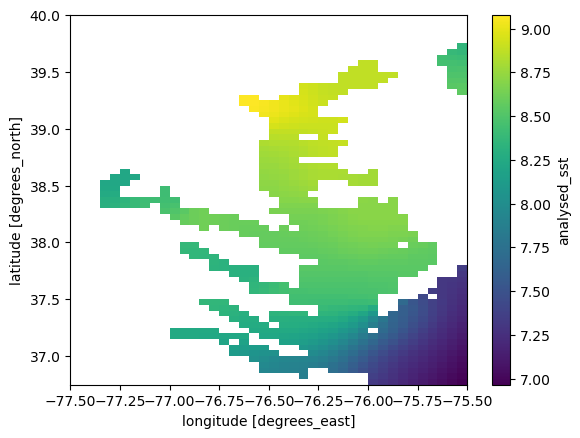

In [4]:
geopolar.std('time').plot()

In [25]:
geopolar.time.dt.day_of_year

AttributeError: 'DatetimeAccessor' object has no attribute 'day_of_year'

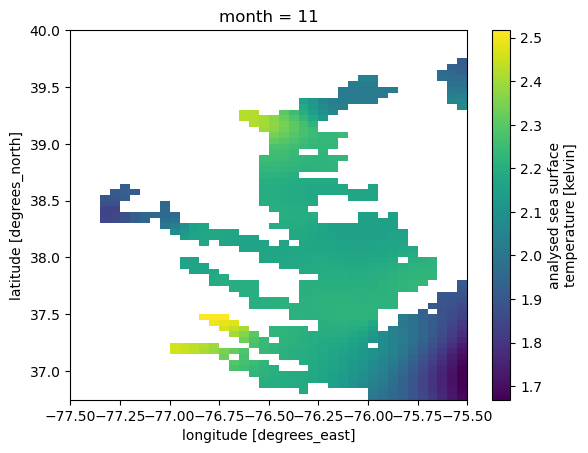

In [68]:
geopolar.groupby(geopolar.time.dt.month).std().isel(month=10).plot()

Depth related?

In [5]:
bath = xr.open_dataset(
    (
        '/Users/rwegener/repos/mhw_ocetrac_census/data/chesapeake_bay_'
        '2017_bathymetry_resampled_geopolargrids.nc'
    )
).depth
bath = bath.sel(latitude=slice(36.75, 40), longitude=slice(-77.5, -75.5))
bath.attrs['units'] = 'meters'

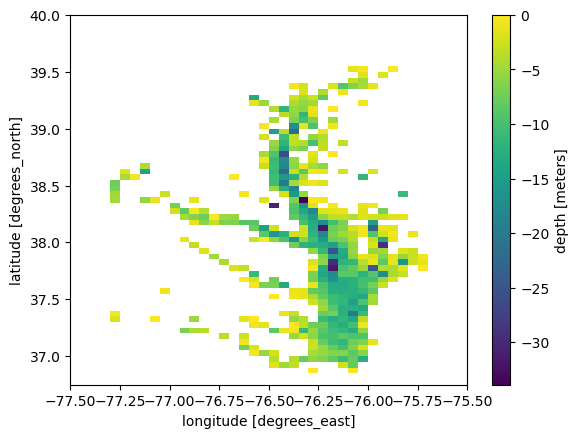

In [6]:
bath.plot()

In [7]:
max_i = xr.open_dataarray(
    os.path.join(REPO_ROOT, 
                 'data/processed/mhw_stats_outputs/average_max_intensity_CBay_geopolar.nc')
)

In [8]:
bath_raw = xr.open_dataset(
    (
        '/Users/rwegener/repos/mhw_ocetrac_census/data/chesapeake_bay_M130_2017_bathymetry.nc'
    )
)

In [9]:
# Crashes :(
# bath_raw.z.plot()

Why do we loose so many data points with the bathymetry? Surprised by that.

In [10]:
max_i.count()

<xarray.DataArray 'avg_max_intensity' ()>
array(803)

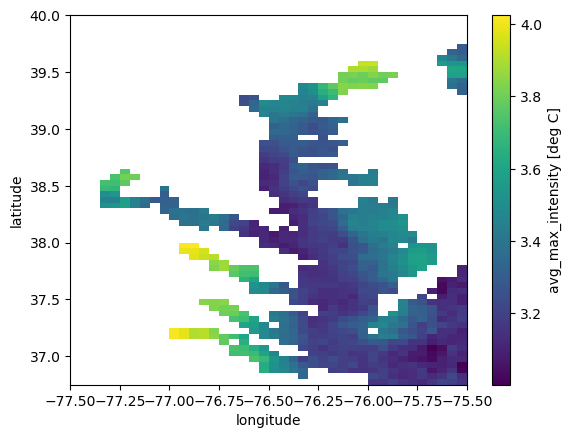

In [11]:
max_i.plot()

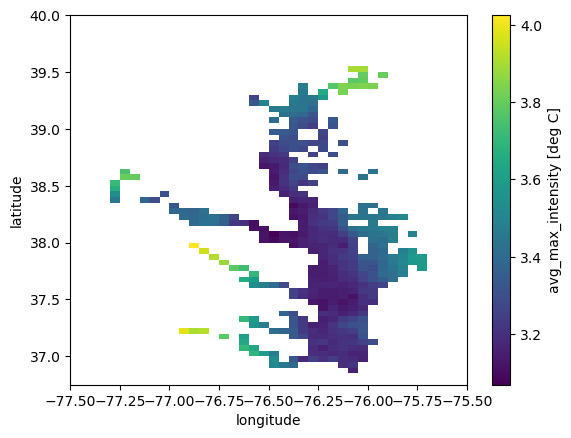

In [12]:
max_i.where(~bath.isnull()).plot()

In [13]:
combined_ds = xr.merge([max_i, bath])

In [14]:
combined_ds

<xarray.Dataset>
Dimensions:            (latitude: 65, longitude: 40)
Coordinates:
  * latitude           (latitude) float32 36.78 36.83 36.88 ... 39.92 39.97
  * longitude          (longitude) float32 -77.47 -77.43 ... -75.57 -75.53
Data variables:
    avg_max_intensity  (latitude, longitude) float64 nan nan nan ... nan nan nan
    depth              (latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    source:           NOAA Geopolar
    unit:             deg C
    description:      returns the average value for the maximum intensity, `i...
    processing_date:  2023-03-15

In [43]:
combined_ds

<xarray.Dataset>
Dimensions:            (latitude: 65, longitude: 40)
Coordinates:
  * latitude           (latitude) float32 36.78 36.83 36.88 ... 39.92 39.97
  * longitude          (longitude) float32 -77.47 -77.43 ... -75.57 -75.53
Data variables:
    avg_max_intensity  (latitude, longitude) float64 nan nan nan ... nan nan nan
    depth              (latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    source:           NOAA Geopolar
    unit:             deg C
    description:      returns the average value for the maximum intensity, `i...
    processing_date:  2023-03-15

**Color by season?** (this is the average for all days there is no season)

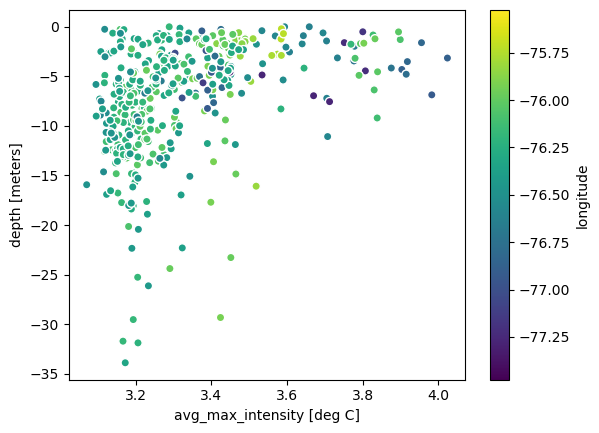

In [15]:
xr.plot.scatter(combined_ds, x='avg_max_intensity', y='depth')

Only at certain depths

In [46]:
filtered = combined_ds.where(combined_ds.depth > -10)

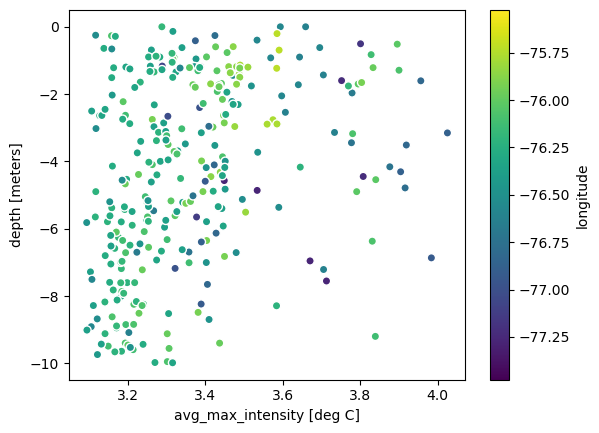

In [48]:
xr.plot.scatter(filtered, x='avg_max_intensity', y='depth')

In [16]:
maxi_df = max_i.where(~bath.isnull()).to_dataframe()
bath_df = bath.to_dataframe()

In [17]:
import pandas as pd

In [18]:
maxi_df.merge(bath_df, right_index=True)

MergeError: Must pass left_on or left_index=True

In [19]:
xr.corr(max_i, bath)

<xarray.DataArray ()>
array(0.3893099)